In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from linear_regression import linear_regression
from sklearn.linear_model import LinearRegression as sklearn_LR
%matplotlib inline

## Переобученность модели

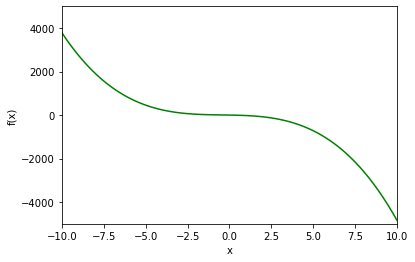

In [2]:
def f(x):
    return 0.6 - 13.2 * x - 5.3 * x ** 2 - 4.17 * x ** 3
dots = np.linspace(-10, 10, 100)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)

plt.plot(dots, f(dots), color='g')

In [3]:
def f(x):
    return 0.6 - 13.2 * x - 5.3 * x ** 2 - 4.17 * x ** 3
np.random.seed(16)
x_data = np.random.uniform(-10, 10, 10)
f_data = [f(i) for i in x_data] + np.random.uniform(-1000, 1000, 10)

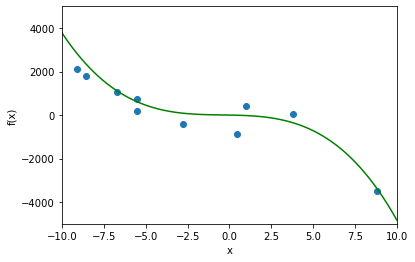

In [4]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)

plt.plot(dots, f(dots), color='g')
plt.scatter(x_data, f_data)

In [5]:
x_data

array([-5.53417842,  0.46326683,  1.01402913, -9.087961  , -2.78542329,
       -5.53838117,  3.77452324, -6.7253715 , -8.59350266,  8.8202172 ])

In [6]:
f_data

array([  745.4884675 ,  -851.08250932,   422.69810766,  2129.66866668,
        -413.07267878,   206.52054624,    44.24369404,  1046.66448866,
        1799.10906399, -3495.863552  ])

In [12]:
class polynomial_regression(linear_regression):
    def __init__(self, max_power, *args, **kwargs):
        self.max_power=max_power
        super().__init__(*args, **kwargs)
    @staticmethod
    def generate_features(x, max_power):
        x=x[:, np.newaxis]
        return np.concatenate([x**i for i in range(1, max_power+1)], axis=1)
    def fit(self, x, y):
        super().fit(self.generate_features(x, self.max_power), y)
    def predict(self, x):
        return super().predict(self.generate_features(x, self.max_power)).flatten()
    def test(self, x, y):
        return super().test(self.generate_features(x, self.max_power), y)
    
class polynomial_regression_sklearn(sklearn_LR):
    def __init__(self, max_power, *args, **kwargs):
        self.max_power=max_power
        super().__init__(*args, **kwargs)
    generate_features=staticmethod(polynomial_regression.generate_features)
    def fit(self, x, y):
        super().fit(self.generate_features(x, self.max_power), y)
    def predict(self, x):
        return super().predict(self.generate_features(x, self.max_power))
    def test(self, x, y):
        return np.sum((self.predict(x) - y)**2) / y.shape[0]

In [10]:
polynomial_regression.generate_features(np.array([1, 2, 3, 4]), 4)

array([[  1,   1,   1,   1],
       [  2,   4,   8,  16],
       [  3,   9,  27,  81],
       [  4,  16,  64, 256]])

In [11]:
#Построение полиномиальной регресси при помощи реализации линейной регрессии из Sklearn
mod1=sklearn_LR()
mod1.fit(polynomial_regression.generate_features(x_data, 3), f_data)
mod1.predict(polynomial_regression.generate_features(x_data, 3))

array([  307.77840643,   -48.2985274 ,   -47.13060843,  2299.31085444,
         -83.91820643,   308.9693798 ,  -318.18124167,   741.44413131,
        1884.45967312, -3410.05956649])

In [13]:
#Построение полиномиальной регресси при ощи созданного нами класса
mod2=polynomial_regression_sklearn(3)
mod2.fit(x_data, f_data)
mod2.predict(x_data)

array([  307.77840643,   -48.2985274 ,   -47.13060843,  2299.31085444,
         -83.91820643,   308.9693798 ,  -318.18124167,   741.44413131,
        1884.45967312, -3410.05956649])

In [14]:
our_mod=polynomial_regression(2)
our_mod.fit(x_data, f_data)
sk_mod=polynomial_regression_sklearn(2)
sk_mod.fit(x_data, f_data)
print('Коэффициенты при факторах(наша модель):', our_mod.w)
print('Коэффициенты при факторах(sklearn):', sk_mod.coef_)
print('Нулевые коэффициенты(интерцепты):',our_mod.w0, sk_mod.intercept_)

Коэффициенты при факторах(наша модель): [[-244.1943038    -8.45469064]]
Коэффициенты при факторах(sklearn): [-245.99569456   -5.82400107]
Нулевые коэффициенты(интерцепты): -50.521599022696385 -219.69194405215626


In [15]:
our_mod.predict(x_data)

array([ 1041.950331  ,  -165.46323275,  -306.83531545,  1470.42505857,
         564.06648443,  1042.58317778, -1092.69286742,  1209.36489745,
        1423.59837175, -2862.11146925])

In [16]:
sk_mod.predict(x_data)

array([  963.31967725,  -334.90351389,  -475.12730327,  1534.8970571 ,
         420.32419835,   964.08251447, -1231.1831019 ,  1171.29729954,
        1464.18020411, -2842.51273709])

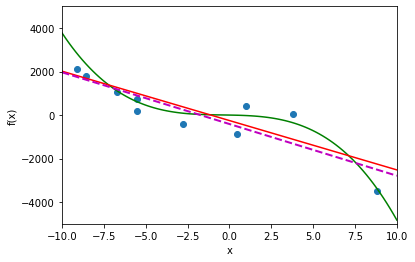

In [17]:
#Актуальные данные
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)
plt.plot(dots, f(dots), color='g')
plt.scatter(x_data, f_data)

#Наша модель
model1 = polynomial_regression(1)
model1.fit(x_data, f_data)
plt.plot(dots, model1.predict(dots), color='r')

#Sklearn
model2 = polynomial_regression_sklearn(1)
model2.fit(x_data, f_data)
plt.plot(dots, model2.predict(dots), 'm--', linewidth=2)

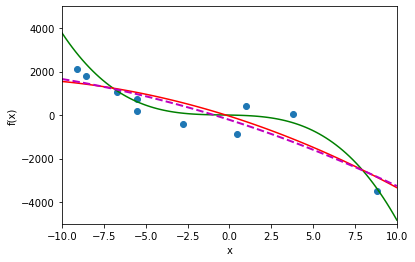

In [18]:
#Актуальные данные
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)
plt.plot(dots, f(dots), color='g')
plt.scatter(x_data, f_data)

#Наша модель
model1 = polynomial_regression(2)
model1.fit(x_data, f_data)
plt.plot(dots, model1.predict(dots), color='r')

#Sklearn
model2 = polynomial_regression_sklearn(2)
model2.fit(x_data, f_data)
plt.plot(dots, model2.predict(dots), 'm--', linewidth=2)

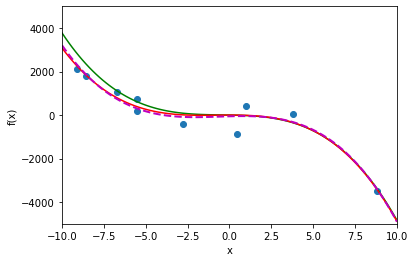

In [19]:
#Актуальные данные
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)
plt.plot(dots, f(dots), color='g')
plt.scatter(x_data, f_data)

#Наша модель
model1 = polynomial_regression(3)
model1.fit(x_data, f_data)
plt.plot(dots, model1.predict(dots), color='r')

#Sklearn
model2 = polynomial_regression_sklearn(3)
model2.fit(x_data, f_data)
plt.plot(dots, model2.predict(dots), 'm--', linewidth=2)

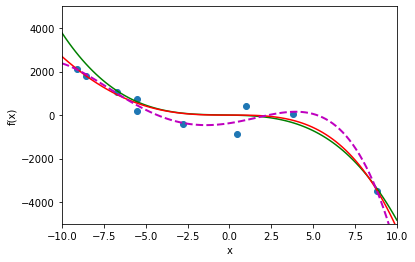

In [20]:
#Актуальные данные
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)
plt.plot(dots, f(dots), color='g')
plt.scatter(x_data, f_data)

#Наша модель
model1 = polynomial_regression(4, 0.01)
model1.fit(x_data, f_data)
plt.plot(dots, model1.predict(dots), color='r')

#Sklearn
model2 = polynomial_regression_sklearn(4)
model2.fit(x_data, f_data)
plt.plot(dots, model2.predict(dots), 'm--', linewidth=2)

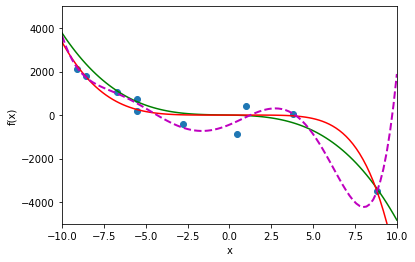

In [21]:
#Актуальные данные
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)
plt.plot(dots, f(dots), color='g')
plt.scatter(x_data, f_data)

#Наша модель
model1 = polynomial_regression(6, 0.0005, max_iter = 1e5)
model1.fit(x_data, f_data)
plt.plot(dots, model1.predict(dots), color='r')

#Sklearn
model2 = polynomial_regression_sklearn(6)
model2.fit(x_data, f_data)
plt.plot(dots, model2.predict(dots), 'm--', linewidth=2)

In [22]:
#Значение штрафной функции для нашей модели и для модели Sklearn
model1.test(x_data, f_data), model2.test(x_data, f_data)

(153501.46050728945, 76841.30434762465)

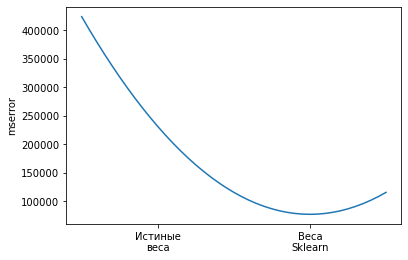

In [23]:
#Истиные коэффициенты используемые для генерации данных
w_true=np.array([[- 13.2,  - 5.3,  - 4.17, 0, 0, 0]])
w0_true=0.6

#Коэффициенты из Sklearn
w_sklearn=model2.coef_[np.newaxis, :]
w0_sklearn=model2.intercept_

x=polynomial_regression.generate_features(x_data, 6)
y=f_data[:, np.newaxis]
n_samples=len(f_data)

x_dots=np.arange(-0.5, 1.55, 0.05)
def _mserror(w, w0):
    diff=x.dot(w.T)+w0-y
    return np.sum(diff**2)/n_samples

mserror_values=np.array([_mserror(w_true+(w_sklearn-w_true)*i, w0_true+(w0_sklearn-w0_true)*i) 
                         for i in x_dots])
#Актуальные данные
plt.ylabel('mserror')
plt.xticks([0, 1], ['Истиные\nвеса', 'Веса\nSklearn'])
plt.plot(x_dots, mserror_values)

### Ремарка: как выполнить оптимизацию при помощи scipy

In [24]:
from scipy.optimize import minimize
class polynomial_regression_lbfgs(polynomial_regression):
    def __init__(self, max_power):
        self.max_power=max_power
    def _optimize(self, X, Y):
        def assign_w(w):
            self.w0=w[0]
            self.w=w[1:][np.newaxis, :]
        def func(w):
            assign_w(w)
            return super(polynomial_regression, self).test(X, Y)
        def jac(w):
            assign_w(w)
            gr_w, gr_w0=self._mserror_grad(X, Y)
            return np.concatenate([[gr_w0], gr_w.flatten()])
        w=np.zeros((X.shape[1]+1,))
        w=minimize(func, w, jac=jac, method='BFGS').x
        assign_w(w)
        

In [25]:
model_bfgs=polynomial_regression_lbfgs(6)
model_bfgs.fit(x_data, f_data)
model_bfgs.test(x_data, f_data)

76841.30434762462

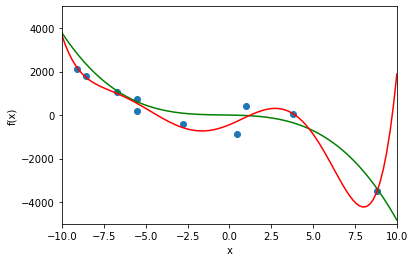

In [26]:
#Актуальные данные
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)
plt.plot(dots, f(dots), color='g')
plt.scatter(x_data, f_data)

#Наша модель
plt.plot(dots, model_bfgs.predict(dots), color='r')

## Кросс-валидация

In [27]:
#Посчитаем р-квадрат
def r_square(y, y_real):
    ss_total=np.sum((y_real-np.mean(y_real))**2)
    ss_res=np.sum((y_real-y)**2)
    return 1-ss_res/ss_total
print(r_square(model2.predict(x_data), f_data))

0.9658418390279783


In [28]:
indexes=np.arange(len(f_data))%5
y_actual=[]
y_predicted=[]

for i in range(5):
    y_actual.append(f_data[indexes==i])
    mod=polynomial_regression_sklearn(6)
    mod.fit(x_data[indexes!=i], f_data[indexes!=i])
    y_predicted.append(mod.predict(x_data[indexes==i]))
    
y_actual=np.concatenate(y_actual)
y_predicted=np.concatenate(y_predicted)
print(r_square(y_predicted, y_actual))

-7794.627882964766


In [29]:
np.sum((y_actual-np.mean(y_actual))**2)/len(y_actual)

2249573.810796306

<b>Домашнее задание</b>

1.У вас, с прошлого урока, имеются реализации расчёта среднеквадратичной ошибки и её градиента для линейнй регрессии с коэффициентами при факторах(w) и свободным коэффициентам.

```python
class linear_regression:
    def _mserror(self, X, y_real):
        #рассчёт среднеквадратичной ошибки
        y = X.dot(self.w.T)+self.w0
        return np.sum((y - y_real)**2) / y_real.shape[0]
    def _mserror_grad(self, X, y_real):
        #рассчёт градиента ошибки.
        #2*delta.T.dot(X)/y_real.shape[0] - градиент по коэффициентам при факторах
        #np.sum(2*delta)/y_real.shape[0] - производная(градиент) при нулевом коэффициенте
        delta=(X.dot(self.w.T)+self.w0-y_real)
        return 2*delta.T.dot(X)/y_real.shape[0], np.sum(2*delta)/y_real.shape[0]
```

В этом задании вы должны модифицировать реализацию рассчёта среднеквадратичной ошибки и рассчёта её производной, так, чтобы с к среднеквадратичной ошибке добавлялась l2 регулярязационная поправка: $ +c*\sum \limits _{j}  w_{j}^2 $ а к градиенту- ссответствующее выражение для градиента регулярязационной поправки.

2.На основе этих функций создайте свою регуляризированную полиномиальную регрессию и опробуйте на одном из примеров построения полиномиальной модели из этого урока. <br>
<i><b>Пояснение:</b>Для этого Вам достаточно создать класс, который наследуется от класса polynomial_regression из данного урока, и переопределить в нём методы mserror, mserror_grad(под переопределением подразумевается создание на новом классе методов с таким же названием). </i>

3*. (по желанию). Оцените оцените предсказательную способность реализованного метода с использование 5-ти ступенчатой кросс-валидации, показанной в примере выше. 

## Масштабируемость и стохастический градиент

In [30]:
from sklearn import datasets
import numpy as np
data, target, coef = datasets.make_regression(n_samples=1000, n_features = 2, n_informative = 2, 
                                              n_targets = 1, 
                                              noise = 5, coef = True, random_state = 2)
target=target[:, np.newaxis]

In [31]:
# Получим средние значения и стандартное отклонение по столбцам

means = np.mean(data, axis=0)
stds = np.std(data, axis=0)
# параметр axis указывается для вычисления значений по столбцам, а не по всему массиву
#(см. документацию в разделе источников)

# вычтем каждое значение признака из среднего и поделим на стандартное отклонение
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        data[i][j] = (data[i][j] - means[j])/stds[j]

In [33]:
# реализуем функцию, определяющую среднеквадратичную ошибку и стохастический градиент
def mserror(X, w, y_real):
    y = X.dot(w.T)
    return np.sum((y - y_real)**2) / y_real.shape[0]

def mserror_stohastic_grad(X, w, y_real):
    i=np.random.randint(X.shape[0])
    x=X[i:i+1, :]
    #print(x.shape, w.shape)
    return 2*(x.dot(w.T)-y_real[i:i+1, :]).T.dot(x)

In [34]:
# инициализируем начальный вектор весов
w = np.zeros((1, 2))

# список векторов весов после каждой итерации
w_list = [w.flatten()]

# список значений ошибок после каждой итерации
errors = []

# шаг градиентного спуска
eta = 0.0001

# максимальное число итераций
max_iter = 1e5

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

np.random.seed(1234)

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    
    # генерируем случайный индекс объекта выборки
    
    new_w = w -  eta * mserror_stohastic_grad(data, w, target)

    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.flatten())
    error=mserror(data, new_w, target)
    errors.append(error)
    if iter_num %1000==0:
        print(error)
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)

print(f'В случае использования стохастического градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')

8190.218510059733
5485.398073030611
3640.970376659881
2460.2249506835715
1668.1801719731363
1141.0463730940132
796.7483090830839
529.9029877301622
367.2479841105942
266.4286096377452
193.06536949767278
145.41686246439448
111.78845804775324
88.27732260524701
71.11785098210943
60.49873933052388
53.486801517846644
48.856726461937484
45.663315170237276
43.199277577735415
41.594494986044666
40.57208731005971
39.946714956499974
39.61620547290568
39.29135143628566
39.04748266692181
38.87388607242228
38.727966940841796
38.66245398542285
38.648100193988874
38.64671693405885
38.6151330901579
38.606142363247216
38.59541259110847
38.589037275085865
38.59726492986365
38.59223788869468
38.60001726679379
38.5835683908754
38.5879232331735
38.573626440223016
38.57586268221657
38.571163106672046
38.571328754919946
38.584444832119715
38.583191337515956
38.57070541901161
38.57127581952632
38.57175276021188
38.57016460813438
38.58569632650173
38.591172852158316
38.60928324052411
38.59149994467424
38.596723

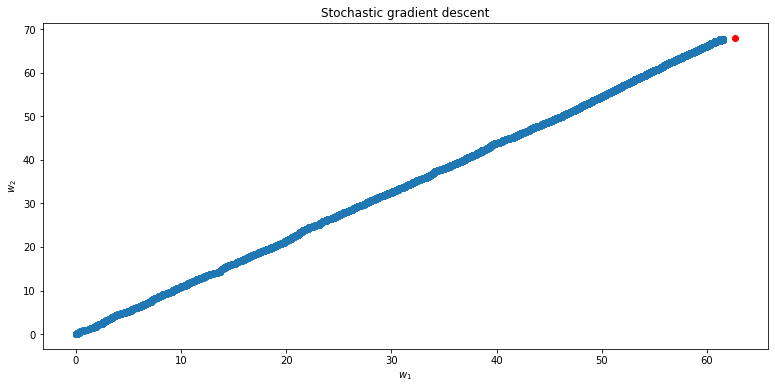

In [35]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
plt.figure(figsize=(13, 6))
plt.title('Stochastic gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list[:, 0], w_list[:, 1])
plt.scatter(coef[0], coef[1], c='r')
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

Text(0, 0.5, 'MSE')

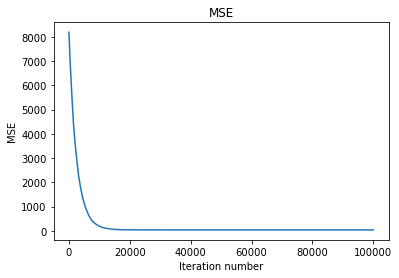

In [36]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(errors)), errors)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

Mini-batch